In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import sqlite3
import pandas as pd

In [2]:
filename = "baseline_v4.3.5_10yrs.db"
runname = filename.replace(".db", "")
con =sqlite3.connect(filename)
df = pd.read_sql("select * from observations where scheduler_note like '%ELAISS%' ;", con)

con.close()

In [3]:
df

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,band,filter,rotSkyPos,rotSkyPos_desired,...,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase,cummTelAz,observation_reason,science_program,cloud_extinction
0,2617,9.280041,-44.179718,60992.068305,60994.075000,29.2,g,g,-124.542111,-124.542111,...,-17.888761,153.575346,12.822944,136.261728,108.510034,44.271193,-193.404391,FBS,DD,0.0
1,2618,9.280041,-44.179718,60992.068721,60994.075000,29.2,g,g,-124.542111,-124.542111,...,-17.888872,153.582037,12.820901,136.264050,108.509745,44.267637,-193.404391,FBS,DD,0.0
2,2619,9.280041,-44.179718,60992.069138,60994.075000,29.2,g,g,-124.542111,-124.542111,...,-17.888983,153.588725,12.818858,136.266371,108.509455,44.264082,-193.404391,FBS,DD,0.0
3,2620,9.280041,-44.179718,60992.069555,60994.075000,29.2,g,g,-124.542111,-124.542111,...,-17.889095,153.595409,12.816817,136.268690,108.509165,44.260528,-193.404391,FBS,DD,0.0
4,2621,9.280041,-44.179718,60992.069971,60994.075000,29.2,g,g,-124.542111,-124.542111,...,-17.889206,153.602089,12.814776,136.271007,108.508876,44.256977,-193.404391,FBS,DD,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22716,2019039,9.369967,-43.836603,64630.315991,64632.116665,29.2,z,z,42.079250,42.079250,...,-13.586430,206.876002,-5.964104,127.750301,118.373002,5.713785,-123.551710,FBS,DD,0.0
22717,2019040,9.369967,-43.836603,64630.316408,64632.116665,29.2,z,z,42.079250,42.079250,...,-13.586568,206.882344,-5.965929,127.746816,118.372739,5.710904,-123.551710,FBS,DD,0.0
22718,2019041,9.369967,-43.836603,64630.316824,64632.116665,29.2,z,z,42.079250,42.079250,...,-13.586705,206.888681,-5.967754,127.743331,118.372477,5.708025,-123.551710,FBS,DD,0.0
22719,2019042,9.369967,-43.836603,64630.317241,64632.116665,29.2,z,z,42.973421,42.973421,...,-13.586842,206.895014,-5.969579,127.739846,118.372214,5.705148,-123.551710,FBS,DD,0.0


In [4]:
bins = np.arange(365*2.5, 365*3.5+1, 1) - 0.5


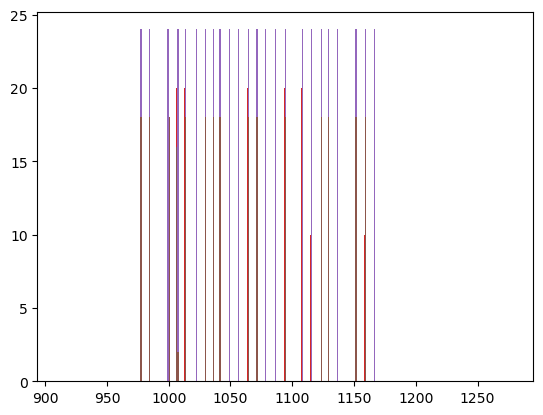

In [5]:

f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}

results = []
colors = []
labels = []
for filtername in f2c:
    good = np.where(df["filter"].values == filtername)[0]
    colors.append(f2c[filtername])
    labels.append(filtername)
    res, _bins, _ack = plt.hist(df["night"].values[good], bins=bins, histtype='bar', stacked=True)

    results.append(res)

In [6]:
ack = np.array(results)
ack.shape

(6, 365)

Text(0.5, 1.0, 'baseline_v4.3.5_10yrs\nELAISS1, 2126 visits')

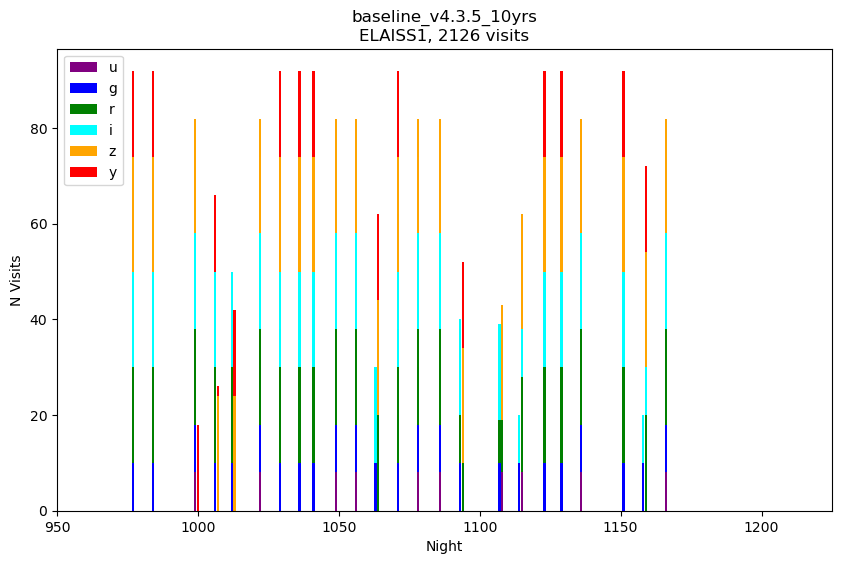

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
bottom = np.zeros(bins.size-1)
running_sum = 0

for i,res in enumerate(results):
    p = ax.bar(bins[:-1], res, bottom=bottom, label=labels[i], color=colors[i])
    bottom += res
    running_sum += np.sum(res)
ax.set_ylabel("N Visits")
ax.set_xlabel("Night")

ax.set_xlim([950, 1225])

ax.legend(loc="upper left")
ax.set_title("%s\nELAISS1, %i visits" % (runname, running_sum))